<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/tensor_flow_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# introductin to regression with neurl networks in tensorflow

there are many diefineitoin f a regression problmen but in our case were goitn to simplify it: predicting a numerical varialbe based on some outehr cominatin of variables even shorter .. predicitng a number

In [2]:
tf.__version__

'2.17.1'

## creatdata toview and fit

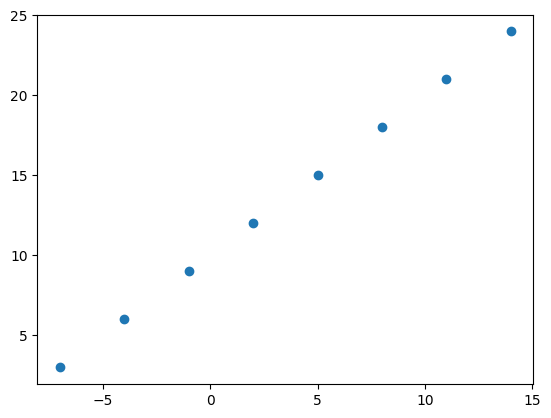

In [21]:
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create lables
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# visulaize it
plt.scatter(X,y)

In [22]:
y == (X + 10)
''' this is the relationship i want my model to fingure it out  '''

' this is the relationship i want my model to fingure it out  '

## INput and output shapes

In [23]:
X.shape, y.shape

((8,), (8,))

In [24]:
# create a demo tensor for our housign price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [25]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [26]:
X[0],y[0]

(-7.0, 3.0)

In [27]:
X[0].ndim

0

In [28]:
X[0],y[0]

(-7.0, 3.0)

In [29]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [30]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [31]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

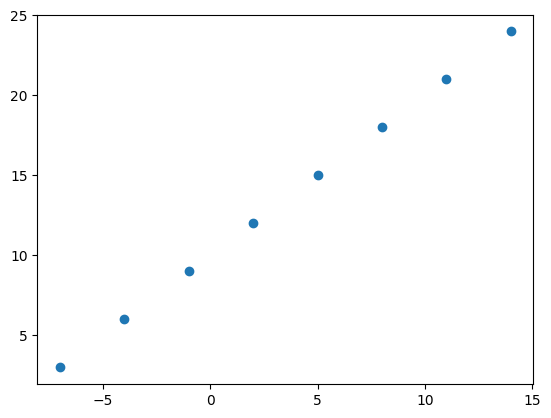

In [32]:
plt.scatter(X,y)

## stps in modelling with tensorflow

1. create  model - define the input and output layes , as well as the hidden layers of a deep learnign model
2. compile a model - define the loss function , and optimzer and also the evaluation metrics ( what w e can use to interpret the performnace of our model).
3. fittign a model - letting the model to try to find y given X

In [38]:
# set the radnom seed
tf.random.set_seed(42)
# create a model using the sequenctial api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)# the output of this layer is one
])
# compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics = ['mae'])
# fit the model
# let first expand the dimension for our model
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 11.8067 - mae: 11.8067
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.7767 - mae: 11.7767
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11.7488 - mae: 11.7488
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7307 - mae: 11.7307
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.7127 - mae: 11.7127
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.6946 - mae: 11.6946
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.6765 - mae: 11.6765
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.6585 - mae: 11.6585
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.6404 - mae: 11.6404
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6223 - mae: 11.6223
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.6043 - mae: 11.6043
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.5877 - mae: 11.5877
Epoch 13/100
1/1 ━━━━━━━

In [39]:
# check out X and y
X, y

(<tf.Tensor: shape=(8, 1, 1), dtype=float64, numpy=
 array([[[-7.]],
 
        [[-4.]],
 
        [[-1.]],
 
        [[ 2.]],
 
        [[ 5.]],
 
        [[ 8.]],
 
        [[11.]],
 
        [[14.]]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [43]:
# try and make a prediction using our model
model.predict([tf.expand_dims(tf.constant([17.0]),axis = -1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[[15.900496]]], dtype=float32)

## imporve our model